# Network Science Final Project
Roberto & Gacera

## Network Analysis on the 2019 election city-level results in Ilocos Region

In [1]:
import pickle
import networkx as nx
import community
from networkx.algorithms import bipartite
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
with open('ILOCOS_nodes_2019.pkl', 'rb') as f:
    nodes = pickle.load(f)

with open('ILOCOS_edges_2019.pkl', 'rb') as f:
    edges = pickle.load(f)
    
with open('ILOCOS_df_2019.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
nodes.shape

(863, 3)

In [4]:
edges.shape

(5740, 4)

### Create weighted directed bipartite network

In [5]:
G = nx.from_pandas_edgelist(edges, 'Source', 'Target', edge_attr=['Weight', 'Position'], create_using=nx.DiGraph)

#### Network statistics

In [6]:
deg = [k for node, k in G.degree(weight='Weight')]
print('Nodes:', G.order())
print('Links:', G.size())
print('Average degree:', np.mean(deg))
print('Min max deg:', np.min(deg), np.max(deg))
print('Ave shortest path:', nx.average_shortest_path_length(G, weight='Weight'))
# print('Diameter:', nx.diameter(G)) - N/A because a directed bipartite network is not strongly connected
# print('Clustering coeff', nx.average_clustering(G, weight='Weight')) - 0 for a bipartite network

Nodes: 771
Links: 5740
Average degree: 6.32060279669347
Min max deg: 0.06192109777015438 116.2747597557863
Ave shortest path: 0.004104287530320429


#### Degree histogram

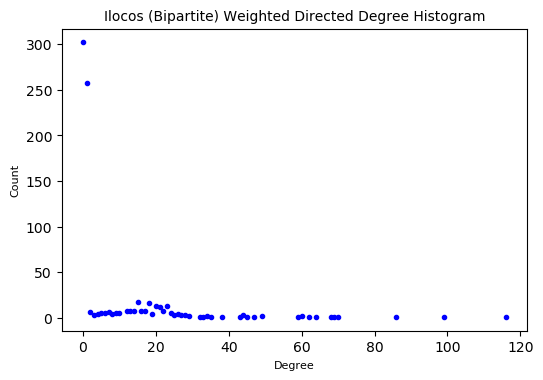

In [7]:
degree_sequence = sorted([int(d) for n, d in G.degree(weight='Weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_title('Ilocos (Bipartite) Weighted Directed Degree Histogram', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Degree histogram (log-scale)

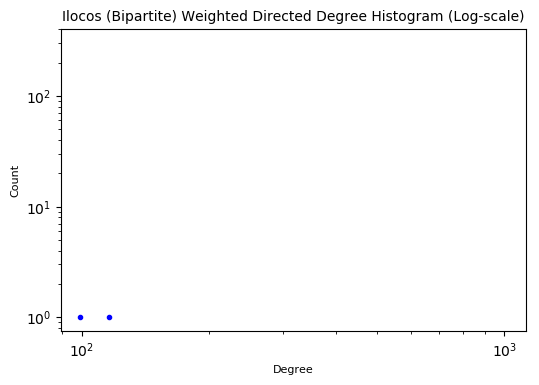

In [8]:
degree_sequence = sorted([int(d) for n, d in G.degree(weight='Weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Ilocos (Bipartite) Weighted Directed Degree Histogram (Log-scale)', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Network visualization

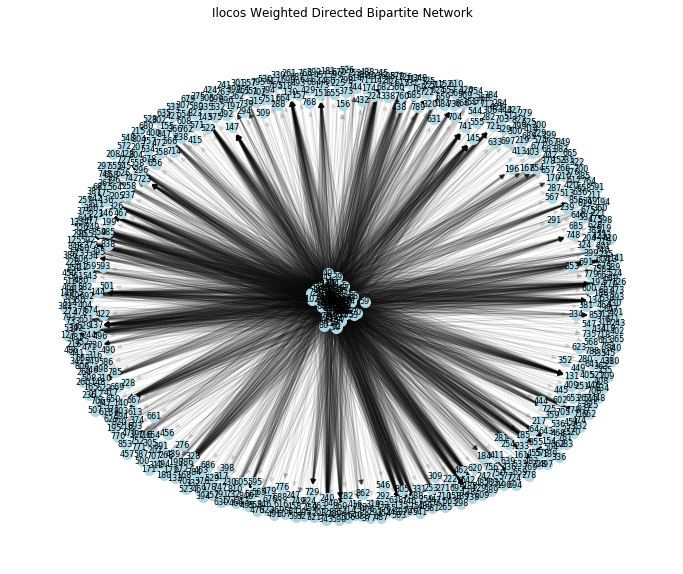

In [9]:
pos = nx.fruchterman_reingold_layout(G);

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=100, node_color="lightblue")
nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw_networkx_labels(G, pos, font_color='black', font_size=8)
plt.title('Ilocos Weighted Directed Bipartite Network')
plt.show();

#### Compute for the centralities

In [10]:
n = 5
print('Ilocos (Bipartite) Weighted Directed')

values = []
for x, y in [(i, j) for i, j in sorted(nx.eigenvector_centrality_numpy(G, weight='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Eigenvector Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.betweenness_centrality(G, weight='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Betweenness Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.closeness_centrality(G, distance='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Closeness Centralities', 'Centrality value']))

Ilocos (Bipartite) Weighted Directed


ID Top 5 Eigenvector Centralities  Centrality value
0  127              MARCOS, IMEE (NP)          0.313288
1  741                   172 PHILRECA          0.261271
2  859         SINGSON, JERRY (BILEG)          0.199426
3  851     SINGSON, RYAN LUIS (BILEG)          0.199426
4  125           VILLAR, CYNTHIA (NP)          0.178708

ID Top 5 Betweenness Centralities  Centrality value
0    0            PANGASINAN/VILLASIS               0.0
1  125           VILLAR, CYNTHIA (NP)               0.0
2    1       PANGASINAN/URDANETA CITY               0.0
3    2          PANGASINAN/URBIZTONDO               0.0
4    3             PANGASINAN/UMINGAN               0.0

ID Top 5 Closeness Centralities  Centrality value
0  147           GADON, LARRY (KBL)          1.427930
1  150           CHONG, GLENN (KDP)          1.233736
2  146   MANGUDADATU, DONG (PDPLBN)          1.119660
3  144         MANICAD, JIGGY (IND)          0.894601
4  149     COLMENARES, NERI (MKBYN)          0.877979

### Convert to a weighted undirected bipartite network

In [11]:
G2 = nx.Graph(G)

#### Network statistics

In [12]:
deg = [k for node, k in G2.degree(weight='Weight')]
print('Nodes:', G2.order())
print('Links:', G2.size())
print('Average degree:', np.mean(deg))
print('Min max deg:', np.min(deg), np.max(deg))
print('Ave shortest path:', nx.average_shortest_path_length(G2, weight='Weight'))
print('Diameter:', nx.diameter(G2))
# print('Clustering coeff', nx.average_clustering(G2, weight='Weight')) - 0 for a bipartite network

Nodes: 771
Links: 5740
Average degree: 6.32060279669347
Min max deg: 0.06192109777015438 116.2747597557863
Ave shortest path: 1.232386626574357
Diameter: 4


#### Degree histogram

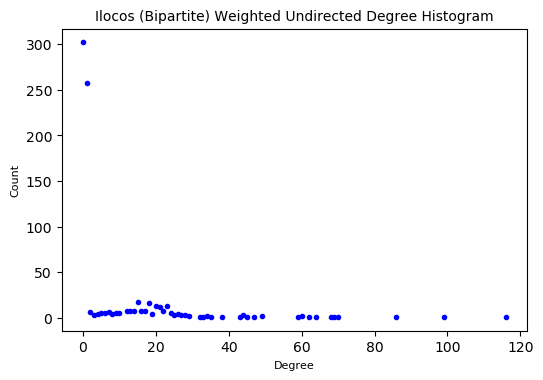

In [13]:
degree_sequence = sorted([int(d) for n, d in G2.degree(weight='Weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_title('Ilocos (Bipartite) Weighted Undirected Degree Histogram', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Degree histogram (log-scale)

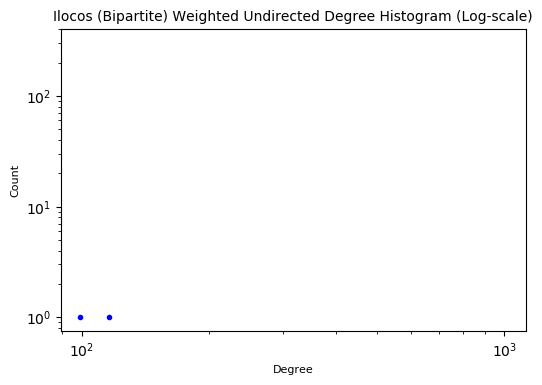

In [14]:
degree_sequence = sorted([int(d) for n, d in G2.degree(weight='Weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Ilocos (Bipartite) Weighted Undirected Degree Histogram (Log-scale)', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Network visualization

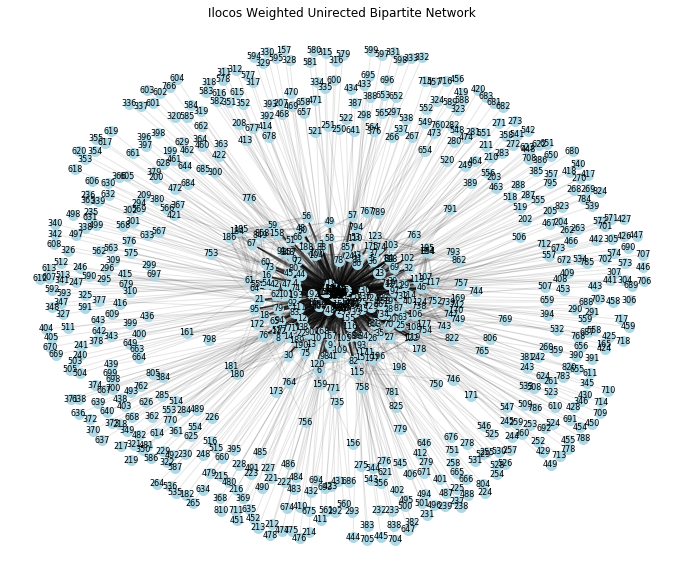

In [15]:
pos = nx.fruchterman_reingold_layout(G2);

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(G2, pos, node_size=100, node_color="lightblue")
nx.draw_networkx_edges(G2, pos, alpha=0.1)
nx.draw_networkx_labels(G2, pos, font_color='black', font_size=8)
plt.title('Ilocos Weighted Unirected Bipartite Network')
plt.show();

#### Compute for the centralities

In [17]:
n = 5
print('Ilocos (Bipartite) Weighted Undirected')

values = []
for x, y in [(i, j) for i, j in sorted(nx.eigenvector_centrality_numpy(G2, weight='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Eigenvector Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.betweenness_centrality(G2, weight='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Betweenness Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.closeness_centrality(G2, distance='Weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Closeness Centralities', 'Centrality value']))

Ilocos (Bipartite) Weighted Undirected


ID Top 5 Eigenvector Centralities  Centrality value
0  127              MARCOS, IMEE (NP)          0.242205
1  125           VILLAR, CYNTHIA (NP)          0.224564
2  126               POE, GRACE (IND)          0.199519
3  128              LAPID, LITO (NPC)          0.160052
4  129             CAYETANO, PIA (NP)          0.159754

ID Top 5 Betweenness Centralities  Centrality value
0  150             CHONG, GLENN (KDP)          0.186557
1  147             GADON, LARRY (KBL)          0.098917
2  154         AGUILAR, FREDDIE (IND)          0.076206
3  151             ALEJANO, GARY (LP)          0.050313
4  145              DIOKNO, CHEL (LP)          0.046365

ID Top 5 Closeness Centralities  Centrality value
0  147           GADON, LARRY (KBL)          1.536545
1  150           CHONG, GLENN (KDP)          1.515875
2  146   MANGUDADATU, DONG (PDPLBN)          1.487169
3  154       AGUILAR, FREDDIE (IND)          1.475346
4  149     COLMENARES, NERI (MKBYN)          1.473901

### Create projected city and politician networks from the weighted undirected bipartite network

#### Create attribute `bipartite` to distinguish between city and politician

In [18]:
nodes['bipartite'] = 1
nodes.loc[nodes.Node_Type=='CITY', 'bipartite'] = 0

#### Add attributes `Label`, `Node_Type` and `bipartite` to the network

In [19]:
for i in sorted(G2.nodes()):
    G2.nodes[i]['Label'] = nodes.Label[i]
    G2.nodes[i]['Node_Type'] = nodes.Node_Type[i]
    G2.nodes[i]['bipartite'] = nodes.bipartite[i]

#### Distinguish the types of nodes:
- top_nodes: city nodes
- bottom_nodes: politician nodes

In [20]:
top_nodes = {n for n, d in G2.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(G2) - top_nodes

#### Define weight function to be used to compute for the edge weight of the projected networks

In [21]:
def weight_func(Gr, u, v):
    w = []
    for x in set(Gr[u]) & set(Gr[v]):
        w.append(Gr[u][x]['Weight'])
        w.append(Gr[v][x]['Weight'])
    return np.mean(w)

#### Project the bipartite network into city and politician networks with the computed weight for each edge using the weight function

In [22]:
G_city = bipartite.generic_weighted_projected_graph(G2, top_nodes, weight_function=weight_func)
G_pol = bipartite.generic_weighted_projected_graph(G2, bottom_nodes, weight_function=weight_func)

### Projected city network

#### Network statistics

In [23]:
deg = [k for node, k in G_city.degree(weight='weight')]
print('Nodes:', G_city.order())
print('Links:', G_city.size())
print('Average degree:', np.mean(deg))
print('Min max deg:', np.min(deg), np.max(deg))
print('Ave shortest path:', nx.average_shortest_path_length(G_city, weight='weight'))
print('Diameter:', nx.diameter(G_city))
print('Clustering coeff', nx.average_clustering(G_city, weight='weight'))

Nodes: 125
Links: 7750
Average degree: 48.954825098633634
Min max deg: 41.435383590993865 59.24880501306973
Ave shortest path: 0.3947969766018852
Diameter: 1
Clustering coeff 0.6819814939594768


#### Network visualization

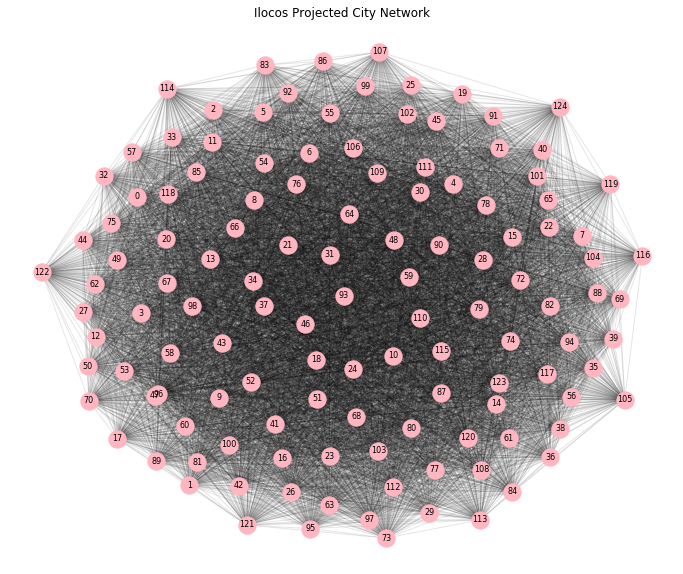

In [24]:
pos = nx.fruchterman_reingold_layout(G_city);

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(G_city, pos, node_size=300, node_color="lightpink")
nx.draw_networkx_edges(G_city, pos, alpha=0.1)
nx.draw_networkx_labels(G_city, pos, font_color='black', font_size=8)
plt.title('Ilocos Projected City Network')
plt.show();

### Projected politician network

#### Network statistics

In [25]:
deg = [k for node, k in G_pol.degree(weight='weight')]
print('Nodes:', G_pol.order())
print('Links:', G_pol.size())
print('Average degree:', np.mean(deg))
print('Min max deg:', np.min(deg), np.max(deg))
print('Ave shortest path:', nx.average_shortest_path_length(G_pol, weight='weight'))
print('Diameter:', nx.diameter(G_pol))
print('Clustering coeff', nx.average_clustering(G_pol, weight='weight'))

Nodes: 646
Links: 28757
Average degree: 47.43046030572855
Min max deg: 7.4252768069538675 511.9924714994601
Ave shortest path: 0.7335501005412872
Diameter: 2
Clustering coeff 0.4467268686607608


#### Degree histogram

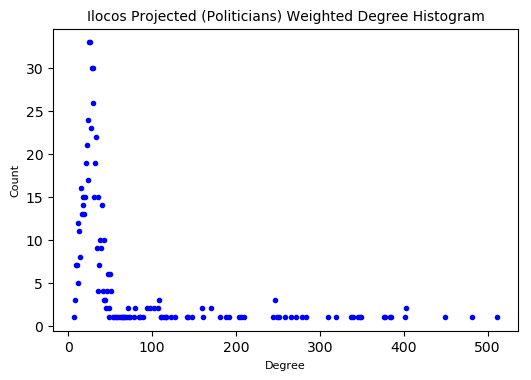

In [26]:
degree_sequence = sorted([int(d) for n, d in G_pol.degree(weight='weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_title('Ilocos Projected (Politicians) Weighted Degree Histogram', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Degree histogram (log-scale)

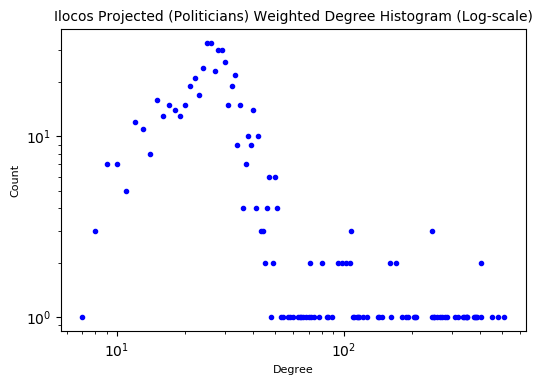

In [27]:
degree_sequence = sorted([int(d) for n, d in G_pol.degree(weight='weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Ilocos Projected (Politicians) Weighted Degree Histogram (Log-scale)', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Network visualization

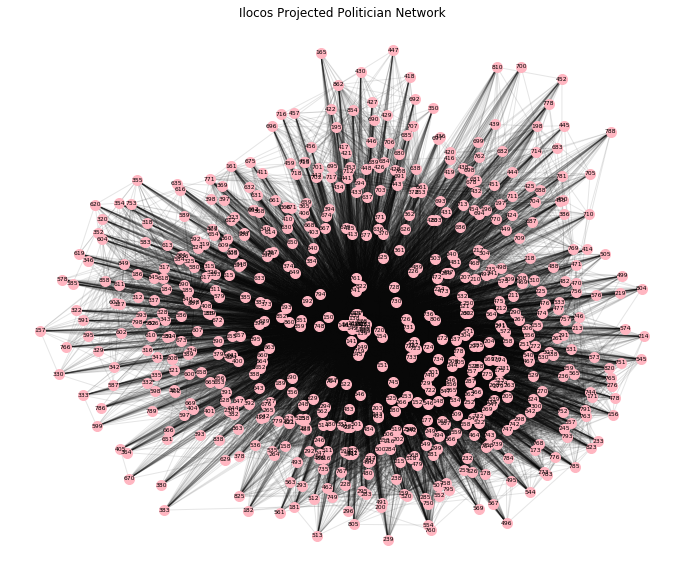

In [28]:
pos = nx.fruchterman_reingold_layout(G_pol);

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(G_pol, pos, node_size=100, node_color="lightpink")
nx.draw_networkx_edges(G_pol, pos, alpha=0.1)
nx.draw_networkx_labels(G_pol, pos, font_color='black', font_size=6)
plt.title('Ilocos Projected Politician Network')
plt.show();

#### Compute for the centralities

In [29]:
n = 5
print('Ilocos Projected (Politicians) Weighted Network')

values = []
for x, y in [(i, j) for i, j in sorted(nx.eigenvector_centrality(G_pol, weight='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Eigenvector Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.betweenness_centrality(G_pol, weight='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Betweenness Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.closeness_centrality(G_pol, distance='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Closeness Centralities', 'Centrality value']))

Ilocos Projected (Politicians) Weighted Network


ID Top 5 Eigenvector Centralities  Centrality value
0  127              MARCOS, IMEE (NP)          0.175486
1  125           VILLAR, CYNTHIA (NP)          0.169140
2  126               POE, GRACE (IND)          0.158957
3  128              LAPID, LITO (NPC)          0.143260
4  129             CAYETANO, PIA (NP)          0.143014

ID Top 5 Betweenness Centralities  Centrality value
0  150             CHONG, GLENN (KDP)          0.177649
1  147             GADON, LARRY (KBL)          0.093832
2  154         AGUILAR, FREDDIE (IND)          0.076460
3  151             ALEJANO, GARY (LP)          0.055756
4  149       COLMENARES, NERI (MKBYN)          0.040498

ID Top 5 Closeness Centralities  Centrality value
0  147           GADON, LARRY (KBL)          2.560987
1  150           CHONG, GLENN (KDP)          2.499445
2  146   MANGUDADATU, DONG (PDPLBN)          2.462764
3  149     COLMENARES, NERI (MKBYN)          2.421552
4  154       AGUILAR, FREDDIE (IND)          2.420444

### Filter the projected politicians network to edges with weight greater than threshold

In [30]:
print('Remove', len([(u, v) for u, v, w in G_pol.edges(data=True) if w['weight'] <= 0.5]), 'edges')
print('Retain', len([(u, v) for u, v, w in G_pol.edges(data=True) if w['weight'] > 0.5]), 'edges')

Remove 11182 edges
Retain 17575 edges


#### Filter edges

In [31]:
G_pol.remove_edges_from([(u, v) for u, v, w in G_pol.edges(data=True) if w['weight'] <= 0.5])

In [32]:
len(G_pol.edges)

17575

#### Network statistics

In [33]:
deg = [k for node, k in G_pol.degree(weight='weight')]
print('Nodes:', G_pol.order())
print('Links:', G_pol.size())
print('Average degree:', np.mean(deg))
print('Min max deg:', np.min(deg), np.max(deg))
print('Ave shortest path:', nx.average_shortest_path_length(G_pol, weight='weight'))
print('Diameter:', nx.diameter(G_pol))
print('Clustering coeff', nx.average_clustering(G_pol, weight='weight'))

Nodes: 646
Links: 17575
Average degree: 37.32374540130319
Min max deg: 3.7188689505165846 486.9440772823392
Ave shortest path: 1.1567543970986354
Diameter: 3
Clustering coeff 0.37560593881723847


#### Degree histogram

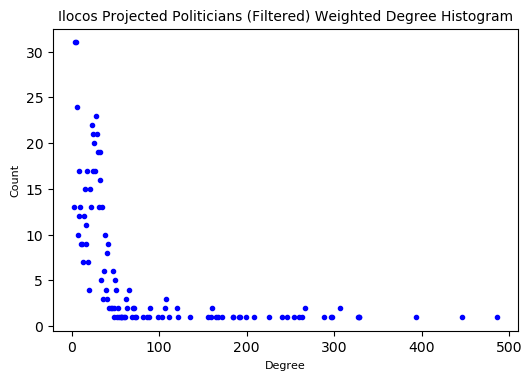

In [34]:
degree_sequence = sorted([int(d) for n, d in G_pol.degree(weight='weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_title('Ilocos Projected Politicians (Filtered) Weighted Degree Histogram', fontdict={'fontsize': 10})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Degree histogram (log-scale)

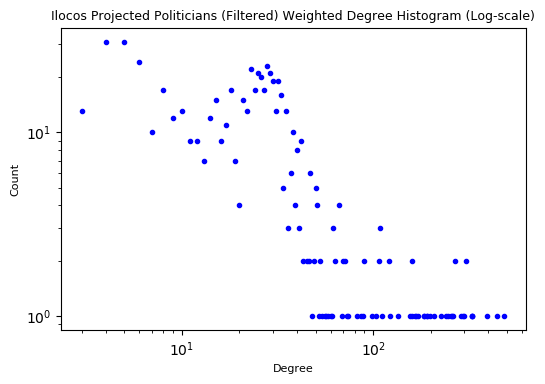

In [35]:
degree_sequence = sorted([int(d) for n, d in G_pol.degree(weight='weight')], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=100)
ax.scatter(deg, cnt, color='b', marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Ilocos Projected Politicians (Filtered) Weighted Degree Histogram (Log-scale)', fontdict={'fontsize': 9})
ax.set_xlabel('Degree', fontdict={'fontsize': 8})
ax.set_ylabel('Count', fontdict={'fontsize': 8});

#### Network visualization

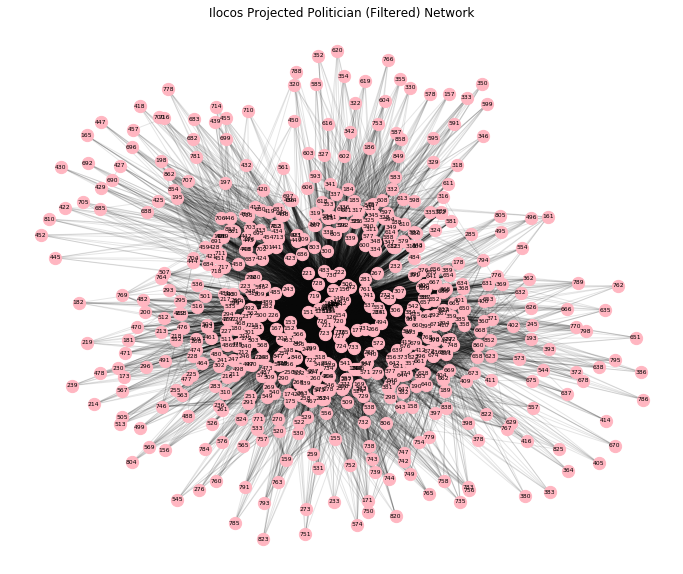

In [36]:
pos = nx.fruchterman_reingold_layout(G_pol);

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(G_pol, pos, node_size=150, node_color="lightpink")
nx.draw_networkx_edges(G_pol, pos, alpha=0.1)
nx.draw_networkx_labels(G_pol, pos, font_color='black', font_size=6)
plt.title('Ilocos Projected Politician (Filtered) Network')
plt.show();

#### Compute for the centralities

In [37]:
n = 5
print('Ilocos Projected Politicians (Filtered) Weighted Network')

values = []
for x, y in [(i, j) for i, j in sorted(nx.eigenvector_centrality(G_pol, weight='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Eigenvector Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.betweenness_centrality(G_pol, weight='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Betweenness Centralities', 'Centrality value']))

values = []
for  x, y in [(i, j) for i, j in sorted(nx.closeness_centrality(G_pol, distance='weight').items(), key=lambda x: -x[1])][:n]:
    values.append((x, nodes[nodes.Id==x].Label.values[0], y))
display(pd.DataFrame(values, columns=['ID', 'Top 5 Closeness Centralities', 'Centrality value']))

Ilocos Projected Politicians (Filtered) Weighted Network


ID Top 5 Eigenvector Centralities  Centrality value
0  127              MARCOS, IMEE (NP)          0.196649
1  125           VILLAR, CYNTHIA (NP)          0.187553
2  126               POE, GRACE (IND)          0.171188
3  128              LAPID, LITO (NPC)          0.147816
4  129             CAYETANO, PIA (NP)          0.147252

ID Top 5 Betweenness Centralities  Centrality value
0  127              MARCOS, IMEE (NP)          0.099229
1  125           VILLAR, CYNTHIA (NP)          0.070526
2  126               POE, GRACE (IND)          0.056300
3  720                    101 ACT-CIS          0.046743
4  150             CHONG, GLENN (KDP)          0.043180

ID Top 5 Closeness Centralities  Centrality value
0  138      PIMENTEL, KOKO (PDPLBN)          1.197728
1  137  TOLENTINO, FRANCIS (PDPLBN)          1.190192
2  139    AQUINO, BENIGNO BAM  (LP)          1.189054
3  135   EJERCITO, ESTRADA JV (NPC)          1.188155
4  136       ESTRADA, JINGGOY (PMP)          1.187387

### Get communities of the projected politicians network

In [38]:
partition = community.best_partition(G_pol, weight='weight')

#### Visualize communties in the network

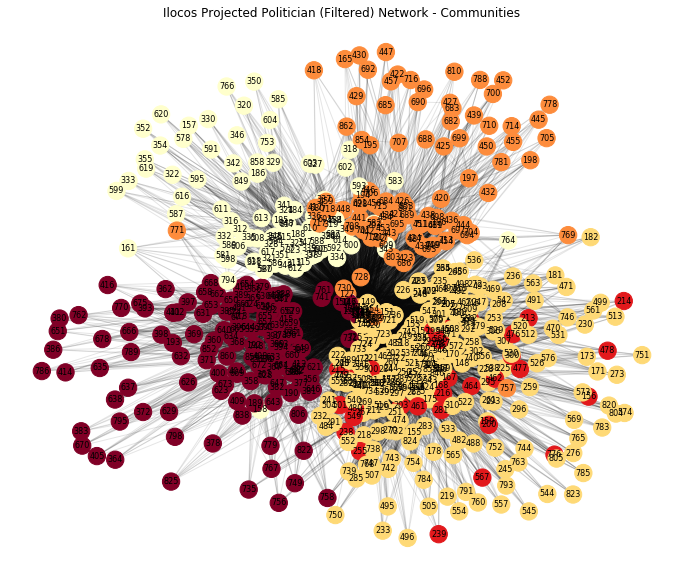

In [39]:
pos = nx.fruchterman_reingold_layout(G_pol);

plt.figure(figsize=(12,10))
plt.axis('off')

nx.draw_networkx_nodes(G_pol, pos, cmap=plt.cm.YlOrRd, node_color=list(partition.values()))
nx.draw_networkx_edges(G_pol, pos, alpha=0.1)
nx.draw_networkx_labels(G_pol, pos, font_size=8)
plt.title('Ilocos Projected Politician (Filtered) Network - Communities')
plt.show()

#### Create dataframe of communities

In [40]:
coms = pd.DataFrame(partition.items(), columns=['Id', 'Partition'])
coms = pd.merge(coms, nodes, how='left')
coms.Partition.unique()

array([0, 1, 2, 3, 4])

In [41]:
coms.head(2)

Id  Partition                 Label Node_Type  bipartite
0  125          0  VILLAR, CYNTHIA (NP)        NP          1
1  126          1      POE, GRACE (IND)       IND          1

#### Create subgraph for each community

In [43]:
parts = coms.groupby('Partition').Id.apply(list).reset_index()

In [44]:
p0 = G_pol.subgraph(parts.loc[0].Id)
p1 = G_pol.subgraph(parts.loc[1].Id)
p2 = G_pol.subgraph(parts.loc[2].Id)
p3 = G_pol.subgraph(parts.loc[3].Id)
p4 = G_pol.subgraph(parts.loc[4].Id)

#### Network statistics

In [45]:
for i, p in enumerate([p0, p1, p2, p3, p4]):
    print('Ilocos Politician - Community '+str(i), '\n')
    deg = [k for node, k in p.degree(weight='weight')]
    print('Nodes:', p.order())
    print('Links:', p.size())
    print('Average degree:', np.mean(deg))
    print('Min max deg:', np.min(deg), np.max(deg))
    print('Ave shortest path:', nx.average_shortest_path_length(p, weight='weight'))
    print('Diameter:', nx.diameter(p))
    print('Clustering coeff', nx.average_clustering(p, weight='weight'))
    print('----------------------------------\n')

Ilocos Politician - Community 0 

Nodes: 106
Links: 1002
Average degree: 14.239748590120994
Min max deg: 2.835791264889393 88.03962155267693
Ave shortest path: 1.1794511573737974
Diameter: 2
Clustering coeff 0.5775933721734442
----------------------------------

Ilocos Politician - Community 1 

Nodes: 253
Links: 4851
Average degree: 26.50866333307405
Min max deg: 2.6634750116767862 195.02791618489414
Ave shortest path: 1.1195223071990803
Diameter: 3
Clustering coeff 0.37660009739567707
----------------------------------

Ilocos Politician - Community 2 

Nodes: 102
Links: 874
Average degree: 13.080261329611485
Min max deg: 2.65905383360522 86.02684888426431
Ave shortest path: 1.2655099662674227
Diameter: 2
Clustering coeff 0.5890796214806147
----------------------------------

Ilocos Politician - Community 3 

Nodes: 35
Links: 140
Average degree: 6.158182636724287
Min max deg: 1.6278730703259006 26.65965592505148
Ave shortest path: 1.2413249935894883
Diameter: 3
Clustering coeff 0.682

#### Network visualization

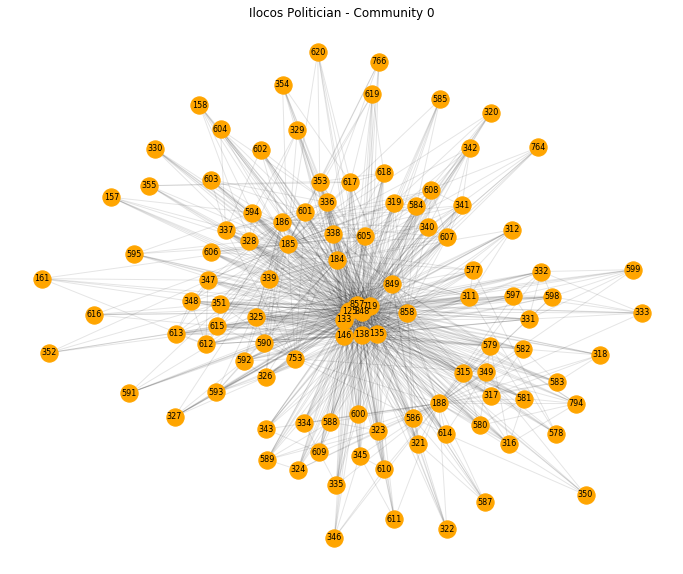

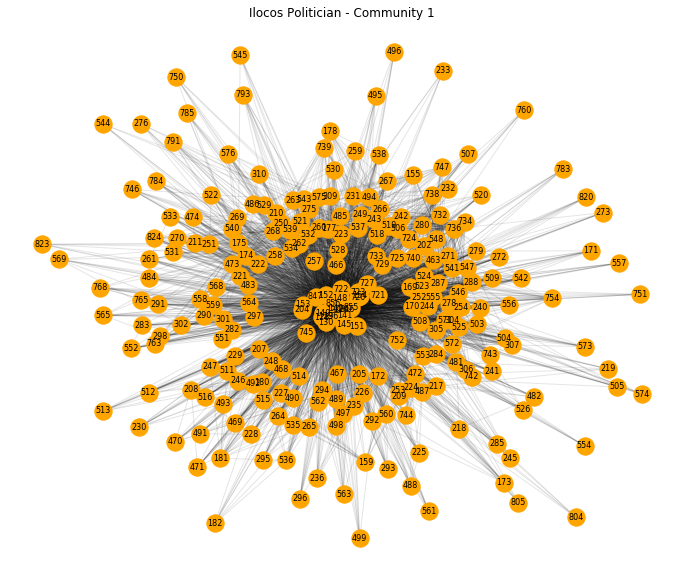

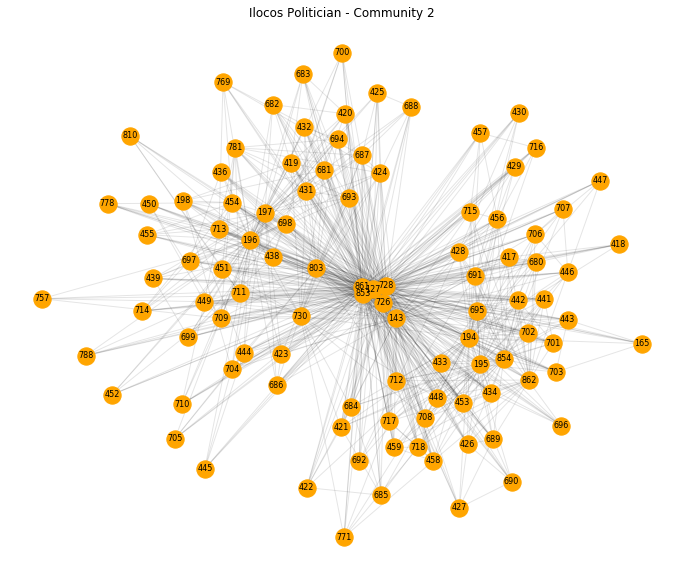

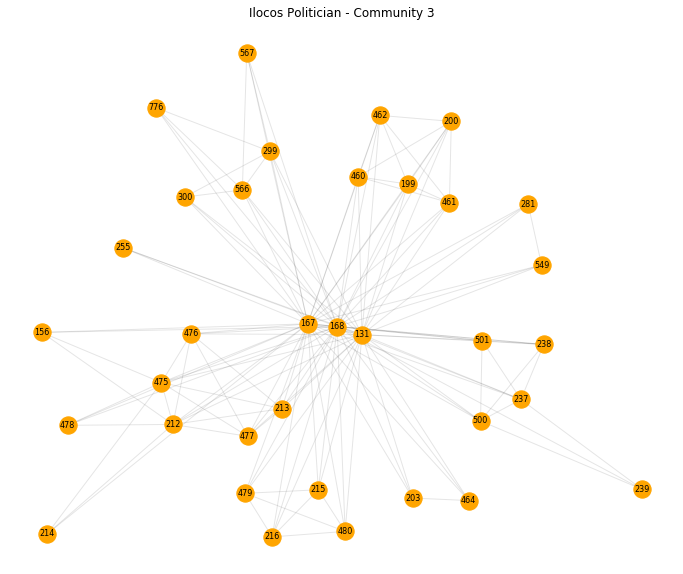

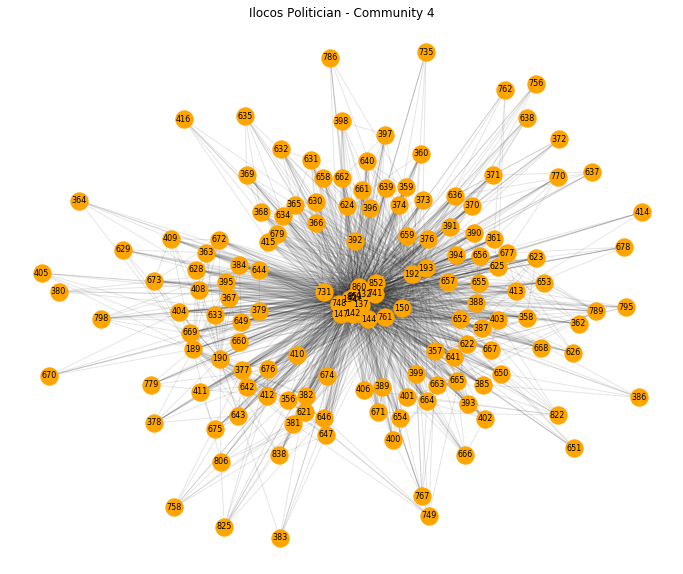

In [46]:
for i, p in enumerate([p0, p1, p2, p3, p4]):
    pos = nx.fruchterman_reingold_layout(p)
    plt.figure(figsize=(12,10))
    plt.axis("off")
    nx.draw_networkx_nodes(p, pos, node_size=300, node_color="orange")
    nx.draw_networkx_edges(p, pos, alpha=0.1)
    nx.draw_networkx_labels(p, pos, font_color='black', font_size=8)
    plt.title('Ilocos Politician - Community '+str(i))
    plt.show();

In [47]:
n = 5
for i, p in enumerate([p0, p1, p2, p3, p4]):
    print('Ilocos Politician - Community '+str(i))
    
    values = []
    for x, y in [(i, j) for i, j in sorted(nx.eigenvector_centrality(p, weight='weight').items(), key=lambda x: -x[1])][:n]:
        values.append((x, nodes[nodes.Id==x].Label.values[0], y))
    display(pd.DataFrame(values, columns=['ID', 'Top 5 Eigenvector Centralities', 'Centrality value']))

    values = []
    for  x, y in [(i, j) for i, j in sorted(nx.betweenness_centrality(p, weight='weight').items(), key=lambda x: -x[1])][:n]:
        values.append((x, nodes[nodes.Id==x].Label.values[0], y))
    display(pd.DataFrame(values, columns=['ID', 'Top 5 Betweenness Centralities', 'Centrality value']))

    values = []
    for  x, y in [(i, j) for i, j in sorted(nx.closeness_centrality(p, distance='weight').items(), key=lambda x: -x[1])][:n]:
        values.append((x, nodes[nodes.Id==x].Label.values[0], y))
    display(pd.DataFrame(values, columns=['ID', 'Top 5 Closeness Centralities', 'Centrality value']))

Ilocos Politician - Community 0


ID Top 5 Eigenvector Centralities  Centrality value
0  857    ORTEGA, MARIO EDUARDO (NUP)          0.298579
1  848         ORTEGA, PACOY (PDPLBN)          0.298579
2  719                       76 ABONO          0.290366
3  125           VILLAR, CYNTHIA (NP)          0.259444
4  185       ERIGUEL, SANDRA (PDPLBN)          0.199745

ID Top 5 Betweenness Centralities  Centrality value
0  125           VILLAR, CYNTHIA (NP)          0.260989
1  146     MANGUDADATU, DONG (PDPLBN)          0.101465
2  138        PIMENTEL, KOKO (PDPLBN)          0.096886
3  719                       76 ABONO          0.055876
4  133             BINAY, NANCY (UNA)          0.054762

ID Top 5 Closeness Centralities  Centrality value
0  857  ORTEGA, MARIO EDUARDO (NUP)          1.192645
1  848       ORTEGA, PACOY (PDPLBN)          1.192645
2  125         VILLAR, CYNTHIA (NP)          1.191539
3  138      PIMENTEL, KOKO (PDPLBN)          1.168867
4  719                     76 ABONO          1.158311

Ilocos Politician - Community 1


ID Top 5 Eigenvector Centralities  Centrality value
0  846     ESPINO, AMADO III (PDPLBN)          0.231122
1  856            LAMBINO, MARK (NPC)          0.228319
2  126               POE, GRACE (IND)          0.209942
3  128              LAPID, LITO (NPC)          0.183123
4  847           CELESTE, ARTHUR (NP)          0.182729

ID Top 5 Betweenness Centralities  Centrality value
0  720                    101 ACT-CIS          0.071255
1  126               POE, GRACE (IND)          0.070417
2  856            LAMBINO, MARK (NPC)          0.066016
3  855   BANIQUED, ANGEL SR. (PDPLBN)          0.045914
4  847           CELESTE, ARTHUR (NP)          0.044773

ID Top 5 Closeness Centralities  Centrality value
0  856          LAMBINO, MARK (NPC)          1.200407
1  846   ESPINO, AMADO III (PDPLBN)          1.200244
2  140          OSMEÑA, SERGE (IND)          1.181039
3  141              ROXAS, MAR (LP)          1.176734
4  136       ESTRADA, JINGGOY (PMP)          1.172733

Ilocos Politician - Community 2


ID Top 5 Eigenvector Centralities  Centrality value
0  853   MANOTOC, MATTHEW MARCOS (NP)          0.319145
1  861        MARCOS, MARIANO II (NP)          0.319145
2  127              MARCOS, IMEE (NP)          0.315355
3  728             91 PROBINSYANO AKO          0.284796
4  194          FARIÑAS, RIA (PDPLBN)          0.202786

ID Top 5 Betweenness Centralities  Centrality value
0  728             91 PROBINSYANO AKO          0.206236
1  143       ENRILE, JUAN PONCE (PMP)          0.138020
2  127              MARCOS, IMEE (NP)          0.085444
3  853   MANOTOC, MATTHEW MARCOS (NP)          0.078566
4  861        MARCOS, MARIANO II (NP)          0.078566

ID  Top 5 Closeness Centralities  Centrality value
0  853  MANOTOC, MATTHEW MARCOS (NP)          1.174052
1  861       MARCOS, MARIANO II (NP)          1.174052
2  127             MARCOS, IMEE (NP)          1.165484
3  143      ENRILE, JUAN PONCE (PMP)          1.142768
4  726            54 ANG PROBINSYANO          1.131325

Ilocos Politician - Community 3


ID Top 5 Eigenvector Centralities  Centrality value
0  167     ESPINO, AMADO JR. (PDPLBN)          0.417733
1  168       GUICO, RAMON III (LAKAS)          0.414158
2  131    ANGARA, EDGARDO SONNY (LDP)          0.338505
3  212                UY, DANILO (NP)          0.178217
4  475           JOVENAL, EDGAR (IND)          0.178217

ID Top 5 Betweenness Centralities  Centrality value
0  131    ANGARA, EDGARDO SONNY (LDP)          0.491979
1  168       GUICO, RAMON III (LAKAS)          0.179441
2  167     ESPINO, AMADO JR. (PDPLBN)          0.134284
3  212                UY, DANILO (NP)          0.002377
4  475           JOVENAL, EDGAR (IND)          0.002377

ID Top 5 Closeness Centralities  Centrality value
0  131  ANGARA, EDGARDO SONNY (LDP)          1.231957
1  167   ESPINO, AMADO JR. (PDPLBN)          1.211081
2  168     GUICO, RAMON III (LAKAS)          1.210446
3  200           SISON, BUTCH (NPC)          0.909919
4  255       RAMOS, ROLANDO (LAKAS)          0.857984

Ilocos Politician - Community 4


ID Top 5 Eigenvector Centralities  Centrality value
0  851     SINGSON, RYAN LUIS (BILEG)          0.285225
1  859         SINGSON, JERRY (BILEG)          0.285225
2  741                   172 PHILRECA          0.246929
3  192      SINGSON, KRISTINE (BILEG)          0.223254
4  132           GO, BONG GO (PDPLBN)          0.198830

ID Top 5 Betweenness Centralities  Centrality value
0  147             GADON, LARRY (KBL)          0.102122
1  741                   172 PHILRECA          0.085291
2  748                142 COOP-NATCCO          0.069336
3  150             CHONG, GLENN (KDP)          0.066570
4  852      ZARAGOZA, ZURIEL (PDPLBN)          0.060675

ID Top 5 Closeness Centralities  Centrality value
0  852    ZARAGOZA, ZURIEL (PDPLBN)          1.205295
1  748              142 COOP-NATCCO          1.194736
2  137  TOLENTINO, FRANCIS (PDPLBN)          1.194321
3  134     DELA ROSA, BATO (PDPLBN)          1.192106
4  860    ZARAGOZA, ANICKA (PDPLBN)          1.191003

### Create nodes file for the projected politician network

In [48]:
pols_nodes = pd.DataFrame(dict(G_pol.degree(weight='weight')).items(), columns=['Id', 'Weight'])

In [49]:
pols_nodes = pd.merge(pols_nodes, nodes)
pols_nodes = pols_nodes[['Id', 'Label', 'Node_Type']]

In [50]:
pols_nodes.head(2)

Id                 Label Node_Type
0  125  VILLAR, CYNTHIA (NP)        NP
1  126      POE, GRACE (IND)       IND

In [51]:
pols_nodes_coms = pd.merge(pols_nodes, coms[['Id', 'Partition']], how='left')

In [52]:
pols_nodes_coms.head(2)

Id                 Label Node_Type  Partition
0  125  VILLAR, CYNTHIA (NP)        NP          0
1  126      POE, GRACE (IND)       IND          1

In [53]:
with open('ILOCOS_pols_nodes_2019.pkl', 'wb') as f:
    pickle.dump(pols_nodes_coms, f)

In [54]:
pols_nodes_coms.to_csv('ILOCOS_pols_nodes_2019.csv', index=False)

### Create edges file for the projected politician network

In [55]:
pols_edges = pd.DataFrame(G_pol.edges(data=True), columns=['Source', 'Target', 'Weight'])

In [56]:
pols_edges.Weight = pols_edges.Weight.apply(lambda x: x['weight'])

In [57]:
pols_edges.head(2)

Source  Target    Weight
0     125     126  0.742038
1     125     127  0.861779

In [58]:
with open('ILOCOS_pols_edges_2019.pkl', 'wb') as f:
    pickle.dump(pols_edges, f)

In [59]:
pols_edges.to_csv('ILOCOS_pols_edges_2019.csv', index=False)

### Create nodes file for the Ilocos network with community tag

In [60]:
nodes_coms = pd.merge(nodes, coms[['Id', 'Partition']], how='left')

In [61]:
nodes_coms.loc[nodes_coms.Partition.isna(), 'Partition'] = 'CITY'

In [62]:
nodes_coms['Type'] = 'POLITICIAN'

In [63]:
nodes_coms.loc[nodes_coms.Node_Type=='CITY', 'Type'] = 'CITY'

In [64]:
nodes_coms.head(2)

Id                     Label Node_Type  bipartite Partition  Type
0   0       PANGASINAN/VILLASIS      CITY          0      CITY  CITY
1   1  PANGASINAN/URDANETA CITY      CITY          0      CITY  CITY

#### Include tag on eigenvector centralities of each community

In [65]:
nodes_coms.loc[nodes_coms.Id.isin([857, 848, 846, 853, 861, 127, 167, 851, 859]), 'Partition'] = 98

In [66]:
nodes_coms[nodes_coms.Partition==98]

Id                         Label Node_Type  bipartite Partition  \
127  127             MARCOS, IMEE (NP)        NP          1        98   
167  167    ESPINO, AMADO JR. (PDPLBN)    PDPLBN          1        98   
846  846    ESPINO, AMADO III (PDPLBN)    PDPLBN          1        98   
848  848        ORTEGA, PACOY (PDPLBN)    PDPLBN          1        98   
851  851    SINGSON, RYAN LUIS (BILEG)     BILEG          1        98   
853  853  MANOTOC, MATTHEW MARCOS (NP)        NP          1        98   
857  857   ORTEGA, MARIO EDUARDO (NUP)       NUP          1        98   
859  859        SINGSON, JERRY (BILEG)     BILEG          1        98   
861  861       MARCOS, MARIANO II (NP)        NP          1        98   

           Type  
127  POLITICIAN  
167  POLITICIAN  
846  POLITICIAN  
848  POLITICIAN  
851  POLITICIAN  
853  POLITICIAN  
857  POLITICIAN  
859  POLITICIAN  
861  POLITICIAN

#### Include tag on betweenness centralities of each community

In [67]:
nodes_coms.loc[nodes_coms.Id.isin([125, 720, 728, 131, 147]), 'Partition'] = 99

In [68]:
nodes_coms[nodes_coms.Partition==99]

Id                        Label   Node_Type  bipartite Partition  \
125  125         VILLAR, CYNTHIA (NP)          NP          1        99   
131  131  ANGARA, EDGARDO SONNY (LDP)         LDP          1        99   
147  147           GADON, LARRY (KBL)         KBL          1        99   
720  720                  101 ACT-CIS  PARTY LIST          1        99   
728  728           91 PROBINSYANO AKO  PARTY LIST          1        99   

           Type  
125  POLITICIAN  
131  POLITICIAN  
147  POLITICIAN  
720  POLITICIAN  
728  POLITICIAN

In [69]:
with open('ILOCOS_coms_nodes_2019.pkl', 'wb') as f:
    pickle.dump(nodes_coms, f)

In [70]:
nodes_coms.to_csv('ILOCOS_coms_nodes_2019.csv', index=False)

### Create files for each community

In [73]:
p0_nodes = pd.DataFrame(dict(p0.degree(weight='weight')).items(), columns=['Id', 'Weight'])
p0_nodes = pd.merge(p0_nodes, nodes)
p0_nodes = p0_nodes[['Id', 'Label', 'Node_Type']]
p0_nodes.to_csv('p0_nodes.csv', index=False)

p0_edges = pd.DataFrame(p0.edges(data=True), columns=['Source', 'Target', 'Weight'])
p0_edges.Weight = p0_edges.Weight.apply(lambda x: x['weight'])
p0_edges.to_csv('p0_edges.csv', index=False)

In [74]:
p1_nodes = pd.DataFrame(dict(p1.degree(weight='weight')).items(), columns=['Id', 'Weight'])
p1_nodes = pd.merge(p1_nodes, nodes)
p1_nodes = p1_nodes[['Id', 'Label', 'Node_Type']]
p1_nodes.to_csv('p1_nodes.csv', index=False)

p1_edges = pd.DataFrame(p1.edges(data=True), columns=['Source', 'Target', 'Weight'])
p1_edges.Weight = p1_edges.Weight.apply(lambda x: x['weight'])
p1_edges.to_csv('p1_edges.csv', index=False)

In [75]:
p2_nodes = pd.DataFrame(dict(p2.degree(weight='weight')).items(), columns=['Id', 'Weight'])
p2_nodes = pd.merge(p2_nodes, nodes)
p2_nodes = p2_nodes[['Id', 'Label', 'Node_Type']]
p2_nodes.to_csv('p2_nodes.csv', index=False)

p2_edges = pd.DataFrame(p2.edges(data=True), columns=['Source', 'Target', 'Weight'])
p2_edges.Weight = p2_edges.Weight.apply(lambda x: x['weight'])
p2_edges.to_csv('p2_edges.csv', index=False)

In [76]:
p3_nodes = pd.DataFrame(dict(p3.degree(weight='weight')).items(), columns=['Id', 'Weight'])
p3_nodes = pd.merge(p3_nodes, nodes)
p3_nodes = p3_nodes[['Id', 'Label', 'Node_Type']]
p3_nodes.to_csv('p3_nodes.csv', index=False)

p3_edges = pd.DataFrame(p3.edges(data=True), columns=['Source', 'Target', 'Weight'])
p3_edges.Weight = p3_edges.Weight.apply(lambda x: x['weight'])
p3_edges.to_csv('p3_edges.csv', index=False)

In [77]:
p4_nodes = pd.DataFrame(dict(p4.degree(weight='weight')).items(), columns=['Id', 'Weight'])
p4_nodes = pd.merge(p4_nodes, nodes)
p4_nodes = p4_nodes[['Id', 'Label', 'Node_Type']]
p4_nodes.to_csv('p4_nodes.csv', index=False)

p4_edges = pd.DataFrame(p4.edges(data=True), columns=['Source', 'Target', 'Weight'])
p4_edges.Weight = p4_edges.Weight.apply(lambda x: x['weight'])
p4_edges.to_csv('p4_edges.csv', index=False)